In [353]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [309]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.warnings.filterwarnings('ignore')

In [310]:
bank = pd.read_csv('bank-additional-full.csv', sep=";")

In [311]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Overview of the bank dataset

This is dataset that describe Portugal bank marketing campaigns results. Conducted campaigns were based mostly on direct phone calls, offering bank's clients to place a term deposit. After the marketing campaign, if a client successfully made deposit - target variable marked 'yes', otherwise 'no'.

A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits

 ####  Aim of the project: 
 #### Consider the marketing effectiveness prediction for the bank.
 

Attribute Information on Bank Dataset:

1. Age
2. Job - type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital - marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. Education - Shows the level of education of each customer (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. Default - Whether a customer has credit in default (categorical: 'no','yes','unknown')
6. Housing - Does the customer have a housing loan? (categorical: 'no','yes','unknown')
7. Loan - Does the customer have a personal loan? (categorical: 'no','yes','unknown')
8. Contact - The contact communication type (categorical: 'cellular','telephone')
9. Month - Last contact month of year
10. day_of_week - Last contact day of Week
11. Duration - Last contact duration in seconds. Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').
12. Campaign - Number of contact performed for the client during the campaign
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
16. emp.var.rate: employment variation rate - quarterly indicator
17. cons.price.idx: consumer price index - monthly indicator
18. cons.conf.idx: consumer confidence index - monthly indicator
19. euribor3m: euribor 3 month rate - daily indicator
20. nr.employed: number of employees - quarterly indicator
21. y - has the client subscribed a term deposit? (binary: 'yes','no')





 #### Inspecting the data

In [312]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [313]:
bank.shape

(41188, 21)

In [339]:
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

 ### Data visualization of the target market for the campaign

In [314]:
# Build a function to show categorical values distribution of the marketing campaign 
def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_deposit'] = bank[bank['y'] == 'no'][column].value_counts()
    temp_1['Yes_deposit'] = bank[bank['y'] == 'yes'][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Target market')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show()

In [315]:
# Curious to know the clients with the types of jobs that either has a 'Yes' or 'No'

bank['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [316]:
job_count= bank.groupby(['job','y']).size().reset_index()
job_count = job_count.rename(columns={0:'Counts'})

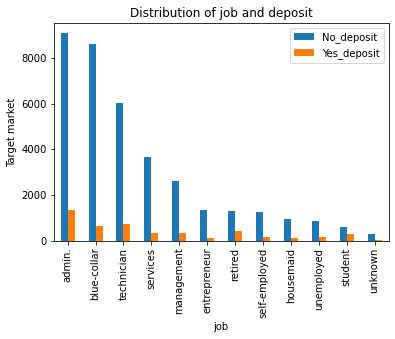

              job    y  Counts
0          admin.   no    9070
1          admin.  yes    1352
2     blue-collar   no    8616
3     blue-collar  yes     638
4    entrepreneur   no    1332
5    entrepreneur  yes     124
6       housemaid   no     954
7       housemaid  yes     106
8      management   no    2596
9      management  yes     328
10        retired   no    1286
11        retired  yes     434
12  self-employed   no    1272
13  self-employed  yes     149
14       services   no    3646
15       services  yes     323
16        student   no     600
17        student  yes     275
18     technician   no    6013
19     technician  yes     730
20     unemployed   no     870
21     unemployed  yes     144
22        unknown   no     293
23        unknown  yes      37


(None, None)

In [317]:
plot_bar('job'), print(job_count)

The administrative workers has the highest positive response to the marketing campaign compared to other target markets, followed by technicians, blue-collar workers and the rest.

In [318]:
# Inspecting the marital status markets


In [319]:
marital_count= bank.groupby(['marital','y']).size().reset_index()
marital_count = marital_count.rename(columns={0:'Counts'})

In [320]:
marital_count

,marital,y,Counts
0,divorced,no,4136
1,divorced,yes,476
2,married,no,22396
3,married,yes,2532
4,single,no,9948
5,single,yes,1620
6,unknown,no,68
7,unknown,yes,12


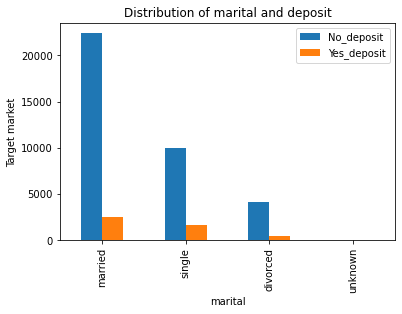

In [321]:
plot_bar('marital')

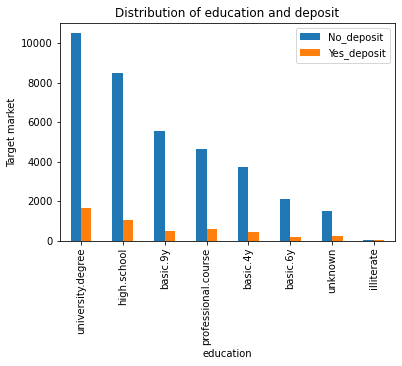

In [322]:
# Education audience column
# University degree holders has more positive response

plot_bar('education')

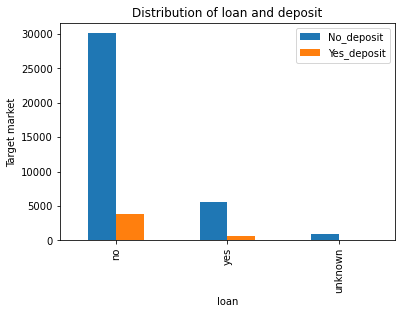

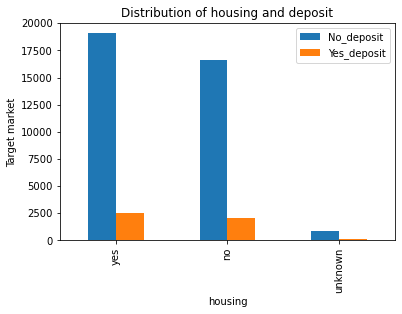

(None, None)

In [323]:
 plot_bar('loan'), plot_bar('housing')

The campaign seeks to gain more customers. The people who have a loan are less likely to enter into a deposit. This is probably the reason why people who don't have loans are way more targetted than people who do have a loan.

#### Evaluation of the mode of marketing strategy for the bank campaign

In [324]:
bank['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

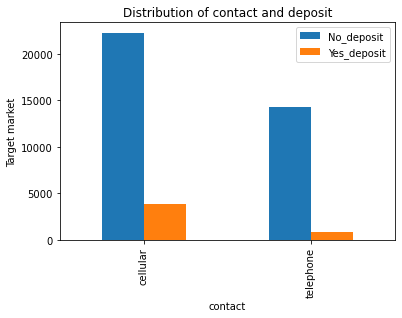

In [325]:
plot_bar('contact')

Best communicative channel was cellular.
Customers can only use landline phones in a single location where there is a wired connection to the telephone network. But Cell phones are operational anywhere the user can get a signal from a wireless network, I believe that is why we have more positive response from clients using cellular. 

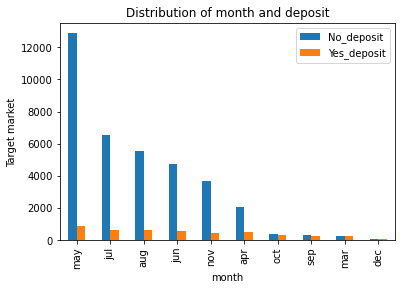

In [326]:
plot_bar('month')

In [327]:
# This is the duration of period a bank campaign manager uses to communicate with prospective customers. 
# this attribute highly affects the output target because if duration=0, then reponse will be 'no'

bank_d= bank.groupby(['duration','y']).size().reset_index()
bank_d = bank_d.rename(columns={0:'Counts'})

In [328]:
bank_d

,duration,y,Counts
0,0,no,4
1,1,no,3
2,2,no,1
3,3,no,3
4,4,no,12
...,...,...,...
2557,3631,yes,1
2558,3643,yes,1
2559,3785,no,1
2560,4199,yes,1


In [329]:
def plot_histogram(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_deposit'] = bank[bank['y'] == 'no'][column].value_counts()
    temp_1['Yes_deposit'] = bank[bank['y'] == 'yes'][column].value_counts()
    temp_1.plot.hist(bins=20)
    plt.xlabel(f'{column}')
    plt.ylabel('Target market')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show()

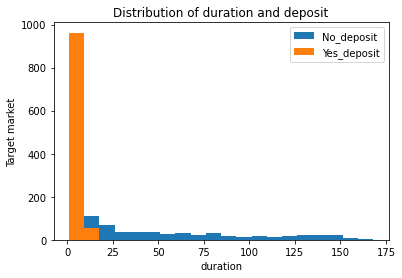

In [330]:
plot_histogram('duration')

In [331]:
#bank['month'].value_counts()

Impact of the marketing campaign

Outcome of the previous marketing campaign ('failure','nonexistent','success')
The camapaign recorded little success

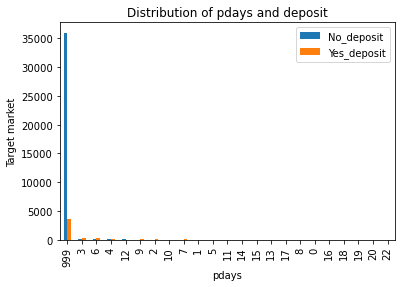

In [332]:
plot_bar('pdays')

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

I believe this is one of the reasons why the marketing campaign was not successful, because the clients were not contacted as a means of follow up.There was no follow up.

In [333]:
bank['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

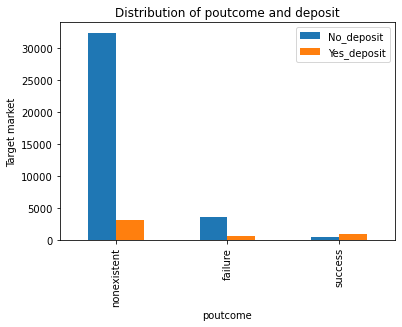

In [334]:
plot_bar('poutcome')

Outcome of the marketing campaign displayed ('failure','nonexistent','success')
The campaign recorded little success.
The bank should focus more on specific categories, based on the visualizations, few working citizens, students and few senior citizens responded better to the campaign. Also, there should be follow up on clients that showed positive response and plan captivating strategies to target these markets. With little budget and targetd compaigns, the marketing strategies will be successful and imapctful.


In [335]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Inspecting for  multicollinearity of other features to the target variable 'y'

In [234]:
bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [235]:
# Convert target variable into numeric
bank['y'] = bank.y.map({'no':0, 'yes':1}).astype('uint8')

In [236]:
# Build correlation matrix
bank_corr = bank.corr()
bank_corr.style.background_gradient(cmap='PuBu')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


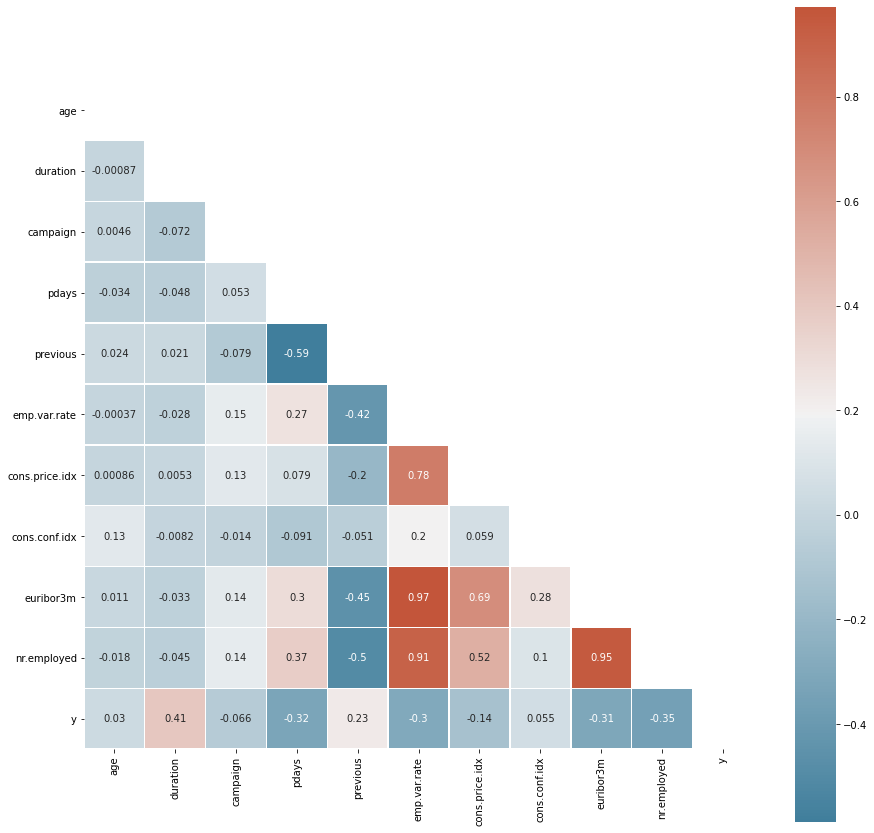

In [237]:
# Build correlation matrix using heatmap
import seaborn as sns

bank_corr = bank.corr()
f, ax = plt.subplots(figsize=(15, 15))
mask = np.triu(np.ones_like(bank_corr, dtype=bool)) # removing the other side of the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True) #preparing cmap
sns.heatmap(bank_corr,mask=mask,cmap=cmap,linewidths=.5,square=True,annot=True)
plt.show()

In [238]:
# euribor3m: euribor 3 month rate - daily indicator
# nr.employed: number of employees - quarterly indicator

From correlation matrix we observe next:

The most correlated with target feature is call duration. Also, we have higly correlated features of uribor3m, nr.employed, and 	emp.var.rate. These columns does the same thing in correlation and we have to remove one or two of them to prevent a bias prediction

## Remove Column Collinearity



In [239]:
# euribor3m - this column means euribor 3 month rate - daily indicator
# nr.employed - number of employees - quarterly indicator Output variable (desired target):

bank_df_after_drop = bank.drop(['euribor3m', 'emp.var.rate'], axis=1)

In [240]:
bank_df_after_drop.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,5191.0,0


#### Print heatmap again after removing 'euribor3m' and 'emp.var.rate' from the dataset

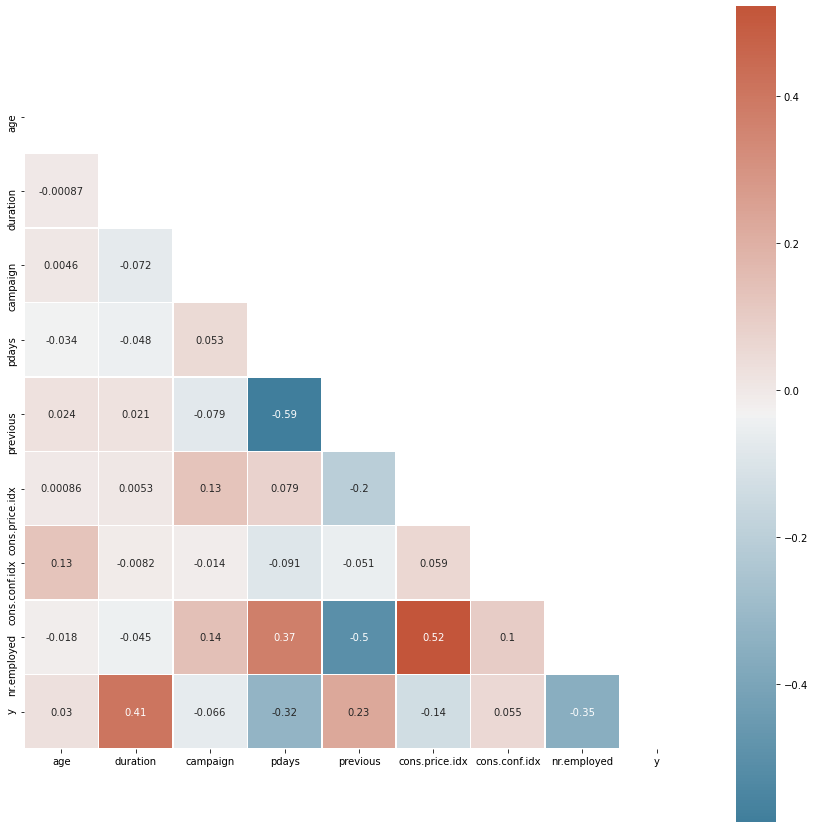

In [241]:
# Print heatmap again

heatmap_corellation = bank_df_after_drop.corr()
f, ax = plt.subplots(figsize=(15, 15))
mask = np.triu(np.ones_like(heatmap_corellation, dtype=bool)) # removing the other side of the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True) #preparing cmap
sns.heatmap(heatmap_corellation,mask=mask,cmap=cmap,linewidths=.5,square=True,annot=True)
plt.show()

### Preprocessing the numerical variables

In [242]:
bank_df_after_drop.describe()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,93.575664,-40.502600,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,0.578840,4.628198,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,92.201000,-50.800000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,93.075000,-42.700000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,93.749000,-41.800000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,93.994000,-36.400000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,94.767000,-26.900000,5228.100000,1.000000


In [243]:
# From my data description, the mean and max has large numbers far apart,
# Variables that are measured at different scales do not contribute equally to the 
# model fitting & model learned function and might end up creating a bias. For better performance, we need to normalise the data

In [244]:
bank_df_after_drop.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,5191.0,0


In [245]:
from sklearn.preprocessing import StandardScaler

data_num = bank_df_after_drop.select_dtypes(include = np.number).drop(columns = 'y')
print(data_num.head())

# Standardizing data
transformer = StandardScaler().fit(data_num)
data_num_standardized = transformer.transform(data_num)
x = pd.DataFrame(data_num_standardized, columns = data_num.columns)

print(x.head())

   age  duration  campaign  pdays  previous  cons.price.idx  cons.conf.idx  \
0   56       261         1    999         0          93.994          -36.4   
1   57       149         1    999         0          93.994          -36.4   
2   37       226         1    999         0          93.994          -36.4   
3   40       151         1    999         0          93.994          -36.4   
4   56       307         1    999         0          93.994          -36.4   

   nr.employed  
0       5191.0  
1       5191.0  
2       5191.0  
3       5191.0  
4       5191.0  
        age  duration  campaign     pdays  previous  cons.price.idx  \
0  1.533034  0.010471 -0.565922  0.195414 -0.349494        0.722722   
1  1.628993 -0.421501 -0.565922  0.195414 -0.349494        0.722722   
2 -0.290186 -0.124520 -0.565922  0.195414 -0.349494        0.722722   
3 -0.002309 -0.413787 -0.565922  0.195414 -0.349494        0.722722   
4  1.533034  0.187888 -0.565922  0.195414 -0.349494        0.722722   

  

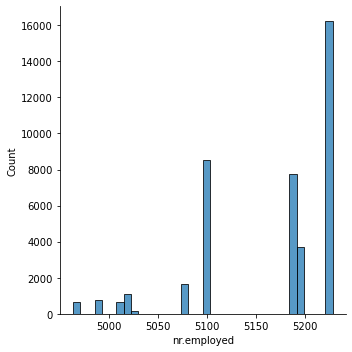

In [246]:
# Before Standardizing my data

sns.displot(bank['nr.employed'])

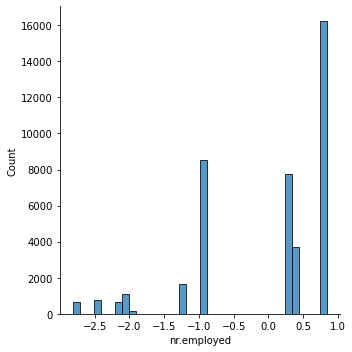

In [247]:
# After Standardizing my data

sns.displot(x['nr.employed'])

### Getting dummies for the categorical variables

In [248]:
# Converting categorical variables to numerical using one hot encoder. It also transforms the data
from sklearn.preprocessing import OneHotEncoder

cat = bank_df_after_drop.select_dtypes(include = np.object)
enc = OneHotEncoder()
categorical = pd.DataFrame(enc.fit_transform(cat).toarray(), columns = enc.get_feature_names())
categorical.head()

,x0_admin.,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,x0_student,x0_technician,...,x7_oct,x7_sep,x8_fri,x8_mon,x8_thu,x8_tue,x8_wed,x9_failure,x9_nonexistent,x9_success
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [249]:
cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [250]:
#categorical.dtypes

In [251]:
categorical.shape

(41188, 53)

In [252]:
categorical.sum(axis = 1)

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
41183    10.0
41184    10.0
41185    10.0
41186    10.0
41187    10.0
Length: 41188, dtype: float64

In [255]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [268]:
bank_df_new = bank_df_after_drop[['age']]

In [269]:
bank_df_new.head(2)

,age
0,56
1,57


In [270]:
y = bank['y']
X = pd.concat((bank_df_new, categorical), axis=1)
X.head()

,age,x0_admin.,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,x0_student,...,x7_oct,x7_sep,x8_fri,x8_mon,x8_thu,x8_tue,x8_wed,x9_failure,x9_nonexistent,x9_success
0,56,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [271]:
bank['y'].shape

(41188,)

In [273]:
bank['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

Label 0 is the class of clients that did not deposit, that is no

Label 1 is the class of clients that deposited after the marketing campaign, that is yes

#### Splitting into train and test set

In [274]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [275]:
y_train.value_counts()

0    29213
1     3737
Name: y, dtype: int64

#### Using LogisticRegression model to generate predictions of the effective marketing campaign both on the training and the testing set

In [276]:
from sklearn.linear_model import LogisticRegression


logisticr = LogisticRegression().fit(X_train, y_train) 

In [278]:
logisticr.score(X_test, y_test)


0.8975479485311969

In [280]:
train_predictions = logisticr.predict(X_train)
test_predictions = logisticr.predict(X_test)

#### Calculating and printing the accuracy score for both the training and the testing set of the bank marketing campaign.

In [281]:
from sklearn.metrics import accuracy_score

print("Training of the bank marketing campaign:", accuracy_score(y_train, train_predictions))
print("Testing of the bank marketing campaign:", accuracy_score(y_test, test_predictions))

Training of the bank marketing campaign: 0.896206373292868
Testing of the bank marketing campaign: 0.8975479485311969


In [306]:
from sklearn.metrics import roc_auc_score

In [307]:
roc_auc_score(y_test, test_predictions)

0.5851075827677339

The accuracy of my model in the test set without optimizing the hyperparameters is 58percent

-- Next step is to use either random or gride search to ptimize my model for a better accuracy score

#### Calculating and printing the balanced accuracy score for both the training and the testing set of the bank marketing campaign dataset.

In [282]:
from sklearn.metrics import balanced_accuracy_score

print("Training:", balanced_accuracy_score(y_train, train_predictions))
print("Testing:", balanced_accuracy_score(y_test, test_predictions))

Training: 0.5867526692403587
Testing: 0.585107582767734


#### Calculating and printing the precision, recall  and F1 score for both the training and the testing set

In [283]:
from sklearn.metrics import precision_score

print("Training:", precision_score(y_train, train_predictions, pos_label=1))
print("Testing:", precision_score(y_test, test_predictions, pos_label=1))

Training: 0.6471680594243269
Testing: 0.6072727272727273


In [284]:
from sklearn.metrics import recall_score

print("Training:", recall_score(y_train, train_predictions, pos_label=1))
print("Testing:", recall_score(y_test, test_predictions, pos_label=1))

Training: 0.18651324591918653
Testing: 0.1849390919158361


#### Calculating and printing the F1 score for both the training and the testing set.

In [285]:
from sklearn.metrics import f1_score

print("Training:", f1_score(y_train, train_predictions, pos_label=1))
print("Testing:", f1_score(y_test, test_predictions, pos_label=1))

Training: 0.28957208142916496
Testing: 0.2835314091680815


In [286]:
bank.shape

(41188, 21)

#### Confusion matrices for both the training and the testing set.

In [287]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, test_predictions)
print(conf_matrix)

[[7227  108]
 [ 736  167]]


From the confusion matrixs above, Class O label(No-class)- 7227 clients that are in class 0, who did not make deposit after the marketing campaign  and 108 clients that are predicted to be in 1 are in class 0.

Class 1(Yes-class): Those that successfully made deposit to the bank after the marketing campaign.
167 clients successful made deposit, but 736 of clients that did not make deposit were wrongly classified in class 1 

<AxesSubplot:>

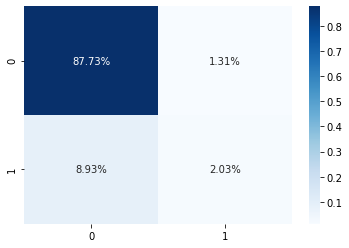

In [288]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [289]:
# True negative of 87.73% are identified as the clients that falls under class 0, people that did not make bank deposit after the campaign
# True positive of 2.03% are correctly identified as the clients that are under class 1, the people that made deposit after the marketing campaign

### Using Decision Tree to generate predictions of the effective marketing campaign both on the training and the testing set

In [290]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier().fit(X_train, y_train)

In [291]:
predictions = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

0.8353969410050983

In [292]:
cf_matrix_tree = confusion_matrix(y_test, predictions)
print(cf_matrix_tree)

[[6605  730]
 [ 626  277]]


<AxesSubplot:>

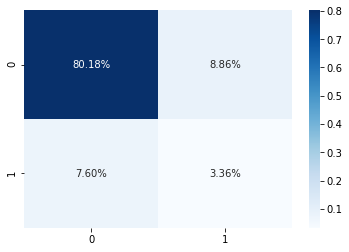

In [293]:
sns.heatmap(cf_matrix_tree/np.sum(cf_matrix_tree), annot=True, 
            fmt='.2%', cmap='Blues')

In [294]:
from sklearn.metrics import precision_score

print(precision_score(y_test, predictions, pos_label=1))
print(recall_score(y_test, predictions, pos_label=1))
print(f1_score(y_test, predictions, pos_label=1))

0.27507447864945384
0.3067552602436323
0.29005235602094237


printing the balance accuracy test for decision tree

In [295]:
balanced_accuracy_score(y_test, predictions)

0.6036162122622388

In [296]:
decisiontree.feature_importances_

array([0.23668819, 0.02417171, 0.01236025, 0.00719478, 0.00489209,
       0.01078778, 0.00638931, 0.00751348, 0.01114157, 0.00511689,
       0.02012897, 0.00683662, 0.0050582 , 0.01444793, 0.01839873,
       0.01717747, 0.00093949, 0.0095066 , 0.00649718, 0.01441989,
       0.01880548, 0.00058729, 0.01478362, 0.02118877, 0.00893502,
       0.00852692, 0.00800362, 0.        , 0.03454421, 0.00312084,
       0.03453691, 0.0173113 , 0.00240929, 0.01836224, 0.00368096,
       0.01177615, 0.0081116 , 0.00917843, 0.00554033, 0.01248303,
       0.01677288, 0.01637739, 0.00747076, 0.01232487, 0.01389881,
       0.00971446, 0.02454934, 0.01982502, 0.0173075 , 0.02433362,
       0.02392037, 0.00962702, 0.01253958, 0.10978526])

In [297]:
print(dict(zip(X.columns, decisiontree.feature_importances_)))

{'age': 0.23668818713091497, 'x0_admin.': 0.02417171421828571, 'x0_blue-collar': 0.012360254453415903, 'x0_entrepreneur': 0.007194784790465053, 'x0_housemaid': 0.004892088322033902, 'x0_management': 0.010787784022183703, 'x0_retired': 0.006389307570049858, 'x0_self-employed': 0.007513476474439507, 'x0_services': 0.011141570514384242, 'x0_student': 0.005116886453879778, 'x0_technician': 0.020128965154393174, 'x0_unemployed': 0.006836621917580366, 'x0_unknown': 0.005058200287027458, 'x1_divorced': 0.014447925114792752, 'x1_married': 0.018398730687263536, 'x1_single': 0.017177472959001412, 'x1_unknown': 0.0009394859752687923, 'x2_basic.4y': 0.009506604574304828, 'x2_basic.6y': 0.0064971762697989465, 'x2_basic.9y': 0.014419887017768203, 'x2_high.school': 0.018805479540453314, 'x2_illiterate': 0.0005872851100507524, 'x2_professional.course': 0.014783622503173268, 'x2_university.degree': 0.021188767144924528, 'x2_unknown': 0.008935018768415215, 'x3_no': 0.008526923117056825, 'x3_unknown': 0.

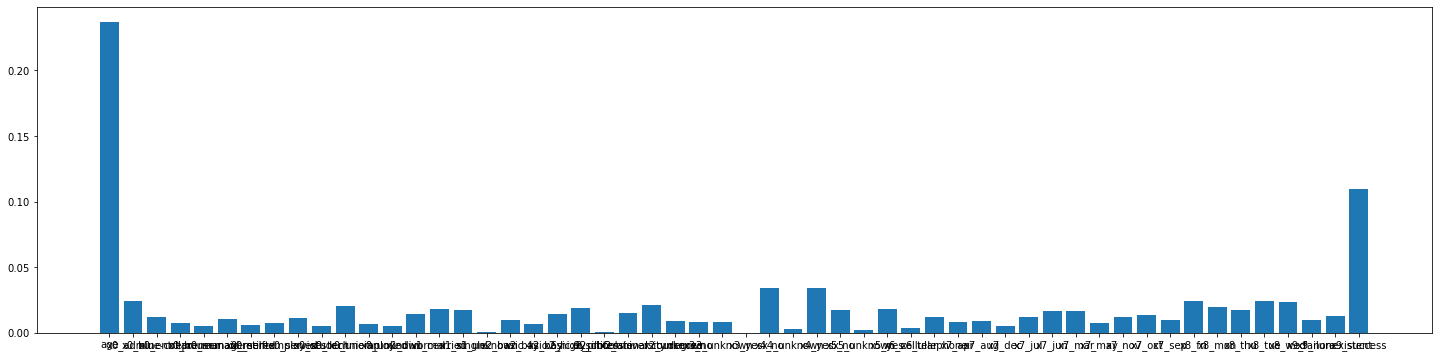

In [298]:
plt.rcParams['figure.figsize'] = [25, 6]
plt.bar(height = decisiontree.feature_importances_, x = X.columns)
plt.show()

SVM

In [299]:
from sklearn.svm import SVC

svm = SVC().fit(X_train, y_train)
predictions = svm.predict(X_test)
print(svm.score(X_test, y_test))
print(pd.Series(predictions).value_counts())

0.8903860160233066
0    8238
dtype: int64


### K-Nearest Neighbors

In [300]:
from sklearn.neighbors import KNeighborsClassifier

nearest_neighbors = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
predictions = nearest_neighbors.predict(X_test)
print(nearest_neighbors.score(X_test, y_test))
print(pd.Series(predictions).value_counts())

0.8829813061422676
0    7893
1     345
dtype: int64


ROC and AUC analysis

In [351]:
from sklearn.metrics import roc_curve, roc_auc_score
#help(roc_curve)

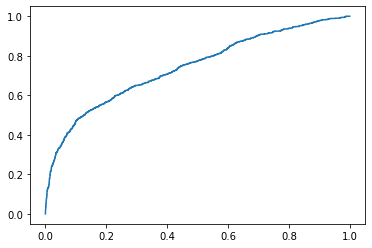

In [352]:
plt.plot(fpr,tpr)

#### Summary

In conclusion, the accuracy of my model without optimizing the hyperparameters is 58 percent. 
ROC prediction will be considered the most accurate because it considers both the majority and the minority of my model. 

#### Logistic regression analysis

In [342]:
from sklearn.metrics import accuracy_score

print("Testing of the bank marketing campaign:", accuracy_score(y_test, test_predictions))

Testing of the bank marketing campaign: 0.8975479485311969


In [343]:

from sklearn.metrics import balanced_accuracy_score

print("Testing:", balanced_accuracy_score(y_test, test_predictions))


Testing: 0.585107582767734


#### Decision Tree

In [344]:
from sklearn.tree import DecisionTreeClassifier

predictions = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

0.8353969410050983

#### K-Nearest Neighbors

In [350]:
from sklearn.neighbors import KNeighborsClassifier

nearest_neighbors = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
predictions = nearest_neighbors.predict(X_test)
print(nearest_neighbors.score(X_test, y_test))
print(pd.Series(predictions).value_counts())

0.8829813061422676
0    7893
1     345
dtype: int64


#### ROC_AUC

In [337]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, test_predictions)

0.5851075827677339